In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## advertising

In [ ]:
df_advertising_org = pd.read_csv('advertising.csv')
df_advertising_org

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df_advertising_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df_advertising_org.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df_advertising_cpy = df_advertising_org[['TV','Radio','Newspaper']].copy()
df_advertising_cpy = MinMaxScaler().fit_transform(df_advertising_cpy)
df_advertising_cpy = pd.DataFrame(df_advertising_cpy, columns=df_advertising_org.columns[:-1])
df_advertising_cpy['Sales'] = df_advertising_org['Sales']
df_advertising_cpy.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,0.494902,0.469032,0.266086,15.130500
std,0.290342,0.299331,0.191545,5.283892
min,0.000000,0.000000,0.000000,1.600000
25%,0.249155,0.201109,0.109499,11.000000
50%,0.504058,0.461694,0.223835,16.000000
75%,0.737656,0.736391,0.394019,19.050000
max,1.000000,1.000000,1.000000,27.000000


<Axes: >

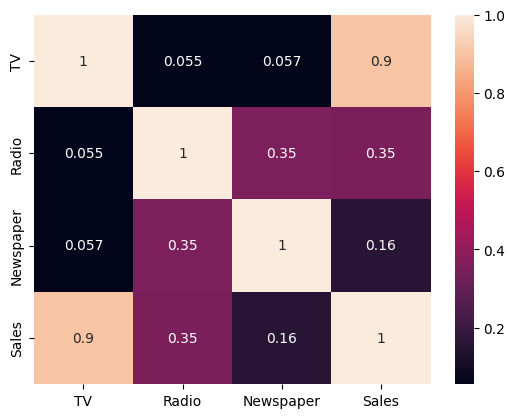

In [ ]:
sns.heatmap(df_advertising_org.corr(), annot=True)

<Axes: >

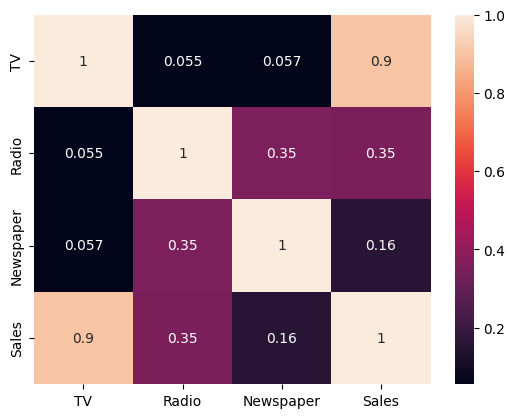

In [ ]:
sns.heatmap(df_advertising_cpy.corr(), annot=True)

In [ ]:
X = df_advertising_org[['TV','Radio','Newspaper']]
y = df_advertising_org['Sales']

results_dict = {}
for i in range(1,4):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  X_poly = poly.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  results_dict[i] = {'r2': r2, 'mae': mae, 'mse': mse, 'rmse': rmse}


results_dict



{1: {'r2': 0.9059011844150826,
  'mae': 1.2748262109549349,
  'mse': 2.9077569102710923,
  'rmse': np.float64(1.7052146229349232)},
 2: {'r2': 0.9533174341074886,
  'mae': 0.9033713382791676,
  'mse': 1.4425426369010854,
  'rmse': np.float64(1.2010589647894416)},
 3: {'r2': 0.9413558587025304,
  'mae': 0.9347124138904264,
  'mse': 1.81216847464724,
  'rmse': np.float64(1.3461680707278865)}}

In [ ]:
X = df_advertising_org[['TV','Radio','Newspaper']]
y = df_advertising_org['Sales']
sizes=np.linspace(start=3, stop=0.2*len(X), num=20)
sizes=sizes.astype(int)
test_r2_score = []
train_r2_score = []
for size in sizes:
  poly = PolynomialFeatures(degree=2, include_bias=False)
  X_poly = poly.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
  lr = LinearRegression()
  lr.fit(X_train[:size], y_train[:size])
  y_pred = lr.predict(X_test)
  train_r2_score.append(r2_score(y_train[:size], lr.predict(X_train[:size])))
  test_r2_score.append(r2_score(y_test, y_pred))

print(test_r2_score)
print(train_r2_score)

[0.41986953748043854, 0.7949842659699111, -2.582588290099099, -6.459707003024447, 0.09357521771376531, -27.753418979041303, 0.7614621842908654, 0.8016225851382887, 0.800256833155479, 0.7878777203125301, 0.38518081122854153, 0.7731838377088691, 0.7566536748297688, 0.6662471938854442, 0.8891466705762323, 0.8741786444924909, 0.8788771854957327, 0.8969917797479168, 0.9317739175639198, 0.9342695805680624]
[1.0, 1.0, 1.0, 1.0, 1.0, 0.960120022131817, 0.9443781867064972, 0.9354642937018989, 0.9707947499135228, 0.9721116177316621, 0.9639399548749339, 0.9568378285930683, 0.9601846625711993, 0.963875439833956, 0.9626304608333587, 0.9529164866594968, 0.9445781820828789, 0.9429661457278499, 0.9417996083224149, 0.9459090005827819]


Text(0, 0.5, 'r2 score')

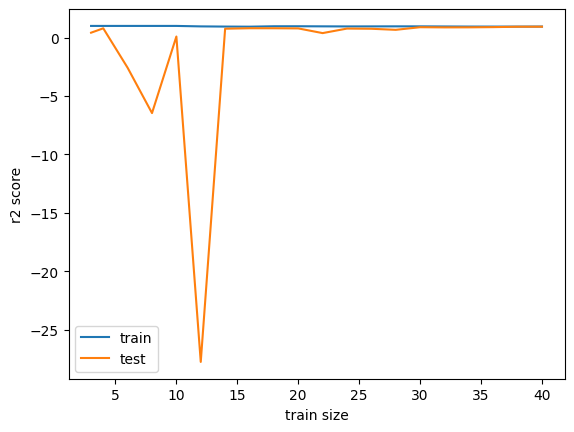

In [ ]:
plt.plot(sizes, np.array(train_r2_score), label='train')
plt.plot(sizes, np.array(test_r2_score), label='test')
plt.legend()
plt.xlabel('train size')
plt.ylabel('r2 score')

In [ ]:
from sklearn.linear_model import Lasso
X = df_advertising_org[['TV','Radio','Newspaper']]
y = df_advertising_org['Sales']
poly_lasso = PolynomialFeatures(degree=2, include_bias=False)
X = poly_lasso.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
lasso_mdl_reg = Lasso(alpha=10, max_iter=100000, tol=0.001)
lasso_mdl_reg.fit(X_train, y_train)
print(lasso_mdl_reg.score(X_train, y_train))
print(lasso_mdl_reg.score(X_test, y_test))

0.927020324829428
0.9026123341706118


In [ ]:
from sklearn.linear_model import Ridge
X = df_advertising_org[['TV','Radio','Newspaper']]
y = df_advertising_org['Sales']
poly_ridge = PolynomialFeatures(degree=2, include_bias=False)
X = poly_ridge.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
ridge_mdl_reg = Ridge(alpha=10,max_iter=100000, tol=0.001)
ridge_mdl_reg.fit(X_train, y_train)
print(ridge_mdl_reg.score(X_train, y_train))
print(ridge_mdl_reg.score(X_test, y_test))

0.9388860565648386
0.9182328592141977
